In [1]:
# imports
# imports
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import custom libraries and scripts
# sys.path.append(os.path.abspath(os.path.join("../..")))
sys.path.append(".")
sys.path.append("..")

from defaults import *
from extract_dataframe import read_json
from extract_dataframe import TweetDfExtractor
from clean_tweets_dataframe import Clean_Tweets

In [3]:
# read processed data set
tweets_df = pd.read_csv('../data/clean_data.csv')

In [4]:
tweets_df.head(10)

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,status_count,retweet_count,screen_name,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-08-07 22:31:20+00:00,Twitter for Android,RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,4,8097,2,i_ameztoy,i_ameztoy,20497,2621,unknown,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",unknown
1,2022-08-07 22:31:16+00:00,Twitter for Android,RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,691,5831,201,ZIisq,ZIisq,65,272,unknown,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",unknown
2,2022-08-07 22:31:07+00:00,Twitter for Android,"China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,1627,0,Fin21Free,Fin21Free,85,392,unknown,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands
3,2022-08-07 22:31:06+00:00,Twitter for Android,"Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,1627,0,Fin21Free,Fin21Free,85,392,unknown,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands
4,2022-08-07 22:31:04+00:00,Twitter for iPhone,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,1521,18958,381,VizziniDolores,VizziniDolores,910,2608,unknown,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz"
5,2022-08-07 22:31:02+00:00,Twitter for Android,RT @benedictrogers: We must not let this happe...,2.000000e-01,0.500000,en,116,48483,36,GraceCh15554845,GraceCh15554845,207,54,0.0,"[{'text': 'Taiwan', 'indices': [84, 91]}]","[{'screen_name': 'benedictrogers', 'name': 'Be...","Melbourne, Victoria"
6,2022-08-07 22:30:59+00:00,Twitter for Android,RT @TGTM_Official: What kind of country can co...,1.583333e-01,0.800000,en,1106,4173,411,Philipkuma1,Philipkuma1,12,264,unknown,"[{'text': 'Taiwan', 'indices': [101, 108]}, {'...","[{'screen_name': 'TGTM_Official', 'name': 'The...",unknown
7,2022-08-07 22:30:59+00:00,Twitter for Android,RT @ChinaInfo777: #PinkFloyd singer Roger Wate...,0.000000e+00,0.000000,en,10,24102,5,nhohn2011,nhohn2011,870,508,unknown,"[{'text': 'PinkFloyd', 'indices': [18, 28]}, {...","[{'screen_name': 'ChinaInfo777', 'name': 'Chin...","Florida, USA"
8,2022-08-07 22:30:50+00:00,Twitter for Android,RT @AmbQinGang: China's SC&amp;FM Wang Yi elab...,0.000000e+00,0.000000,en,1221,630,239,ClaudioColomaRI,ClaudioColomaRI,127,263,unknown,"[{'text': 'Taiwan', 'indices': [80, 87]}]","[{'screen_name': 'AmbQinGang', 'name': 'Qin Ga...",El mundo periférico
9,2022-08-07 22:30:45+00:00,Twitter Web App,RT @CGMeifangZhang: Chinese ambassador to the ...,2.000000e-01,0.375000,en,49,107188,25,jmarzola1,jmarzola1,213,877,unknown,"[{'text': 'USA', 'indices': [66, 70]}, {'text'...","[{'screen_name': 'CGMeifangZhang', 'name': 'Zh...",unknown


### Making explorations

In [5]:
# shape of dataframe
tweets_df.shape

(7440, 17)

In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7440 entries, 0 to 7439
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          7440 non-null   object 
 1   source              7440 non-null   object 
 2   original_text       7440 non-null   object 
 3   polarity            7440 non-null   float64
 4   subjectivity        7440 non-null   float64
 5   lang                7440 non-null   object 
 6   favorite_count      7440 non-null   int64  
 7   status_count        7440 non-null   int64  
 8   retweet_count       7440 non-null   int64  
 9   screen_name         7440 non-null   object 
 10  original_author     7440 non-null   object 
 11  followers_count     7440 non-null   int64  
 12  friends_count       7440 non-null   int64  
 13  possibly_sensitive  7440 non-null   object 
 14  hashtags            7440 non-null   object 
 15  user_mentions       7440 non-null   object 
 16  place 

In [7]:
tweets_df.isna().sum()

created_at            0
source                0
original_text         0
polarity              0
subjectivity          0
lang                  0
favorite_count        0
status_count          0
retweet_count         0
screen_name           0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

No missing values

In [8]:
# stats about numerical columns
tweets_df.describe()

,polarity,subjectivity,favorite_count,status_count,retweet_count,followers_count,friends_count
count,7440.000000,7440.000000,7440.000000,7.440000e+03,7440.000000,7.440000e+03,7440.000000
mean,0.056783,0.295638,203.351210,4.900565e+04,38.713172,4.107761e+04,1715.558871
std,0.230156,0.287805,1655.690148,1.432954e+05,326.757025,4.910108e+05,5305.897528
min,-1.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,1.549250e+03,0.000000,7.275000e+01,106.000000
50%,0.000000,0.250000,0.000000,7.904000e+03,0.000000,3.670000e+02,440.000000
75%,0.136364,0.500000,4.000000,3.510900e+04,2.000000,1.833000e+03,1505.000000
max,1.000000,1.000000,65170.000000,4.108317e+06,17409.000000,1.449852e+07,208360.000000


#### Univariates

In [9]:
tweets_df.original_author

0            i_ameztoy
1                ZIisq
2            Fin21Free
3            Fin21Free
4       VizziniDolores
             ...      
7435     PelosiLibArmy
7436    SonnyMullins13
7437      TECO_Toronto
7438       samserjio93
7439      ZeitounRimal
Name: original_author, Length: 7440, dtype: object

In [10]:
tweets_df.original_author.value_counts()

TrumpThuan         116
AarianNewsX         57
CGMeifangZhang      43
SoizaDavid          42
doos94619918        36
                  ... 
AoxiPRNew            1
Eloy_Sauvan          1
carnivorecabbie      1
FarmSailing          1
ZeitounRimal         1
Name: original_author, Length: 4624, dtype: int64

<AxesSubplot:title={'center':'Top 10 Tweeters'}, xlabel='Twitter', ylabel='Number of tweets'>

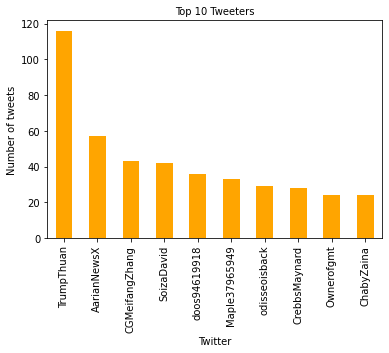

In [11]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Twitter', fontsize=10)
ax.set_ylabel('Number of tweets' , fontsize=10)
ax.set_title('Top 10 Tweeters', fontsize=10)
tweets_df.original_author.value_counts()[:10].plot(ax=ax, kind='bar', color='orange')

#### locations

In [12]:
tweets_df.place.value_counts()

unknown                           2805
Việt Nam                           116
India                              107
United States                       72
Turn on 🔔                           57
                                  ... 
New York, New York                   1
Fontaines-Saint-Martin, France       1
🇺🇲🇺🇲🇺🇲                               1
Lisbon                               1
🇺🇲🇷🇺🇺🇦🇫🇷🇦🇪🇮🇱🏳️‍🌈                     1
Name: place, Length: 1809, dtype: int64

Most locations are unknown

<AxesSubplot:title={'center':'Top 4 Locations'}, xlabel='Twitters', ylabel='Number of locations'>

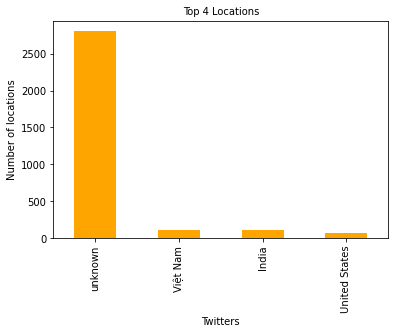

In [13]:
# top 4 locations of users
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Twitters', fontsize=10)
ax.set_ylabel('Number of locations' , fontsize=10)
ax.set_title('Top 4 Locations', fontsize=10)
tweets_df.place.value_counts()[:4].plot(ax=ax, kind='bar', color='orange')

#### source

In [17]:
tweets_df["source"].value_counts()[:5]

Twitter Web App        2717
Twitter for Android    2360
Twitter for iPhone     1531
Twitter for iPad        191
TweetDeck               127
Name: source, dtype: int64

The top five sources of tweets

<AxesSubplot:title={'center':'Top 5 sources'}, xlabel='Twitters', ylabel='Number of sources'>

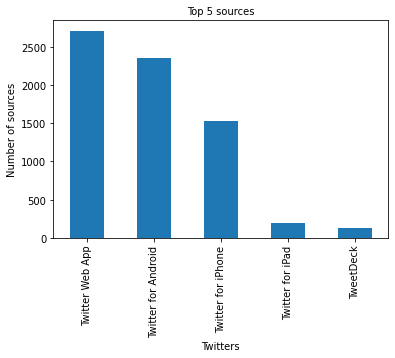

In [18]:
# top 5 sources of users
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Twitters', fontsize=10)
ax.set_ylabel('Number of sources' , fontsize=10)
ax.set_title('Top 5 sources', fontsize=10)
tweets_df.source.value_counts()[:5].plot(ax=ax, kind='bar')